In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
geo_df = gpd.read_file("../Data/GeoData/MGN_DPTO_POLITICO.shp")
coeffs = pd.read_csv("../Data/Logit/Coeff.csv",index_col=0)

In [3]:
seg_soc = coeffs[coeffs.index.str.startswith('SEG_SOC')].copy()
seg_soc.index = seg_soc.index.str[-1].astype(int)
seg_soc.sort_index(inplace=True)
seg_soc

,0
2,0.408191
3,-0.063989
4,-0.095403
5,-0.328794
9,-2.496089


In [4]:
tipo_emb = coeffs[coeffs.index.str.startswith('TIPO_EMB')].copy()
tipo_emb.index = tipo_emb.index.str[-1].astype(int)
tipo_emb.sort_index(inplace=True)

In [5]:
niv_edu = coeffs[coeffs.index.str.startswith('NIV_EDU')].copy()
niv_edu.index = niv_edu.index.str[-1:].astype(int)
niv_edu.loc[10,:] = niv_edu.loc[0,:]
niv_edu=niv_edu.drop(0)
niv_edu.sort_index(inplace=True)
niv_edu

,0
2,-0.314089
3,-0.177745
4,-0.286268
5,-0.030505
6,0.766688
7,-0.398750
8,-0.528104
9,1.152241
10,-0.638836


In [6]:
area_res = coeffs[coeffs.index.str.startswith('AREA')].copy()
area_res.index = area_res.index.str[-3:].astype(float)

area_res

,0
2.0,-0.374051
3.0,-0.419718
9.0,-1.959283


In [7]:
dpto = coeffs[coeffs.index.str.startswith('DEPTO')].copy()
dpto.index = dpto.index.str[-2:].str.replace('_','0')
dpto.loc['11',:] = 0
dpto.head()

,0
01,0.827520
05,-0.126194
08,-1.641525
13,-1.246678
15,-0.808883


In [8]:
geo_df = geo_df.merge(dpto,left_on='DPTO_CCDGO',right_index=True).rename(columns={'0':'LogitCoeff'})
#geo_df.LogitCoeff -= geo_df.LogitCoeff.min()  #Rescale so minimum is at 0
geo_df.head()

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,Shape_Leng,Shape_Area,geometry,LogitCoeff
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2018,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852...",-0.872283
1,19,CAUCA,1857,15 de junio de 1857,2018,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870...",-0.281882
2,86,PUTUMAYO,1991,Articulo 309 Constitucion Politica de 1991,2018,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730...",0.084112
3,76,VALLE DEL CAUCA,1910,Decreto No 340 de 16 de Abril de 1910,2018,12.650870,1.679487,"MULTIPOLYGON (((-77.23810 4.04049, -77.23774 4...",-0.229723
4,94,GUAINÍA,1991,Articulo 309 Constitucion Politica de 1991,2018,21.179051,5.747937,"POLYGON ((-67.67638 3.91228, -67.67305 3.90931...",-0.409682


In [32]:
from matplotlib.colors import LinearSegmentedColormap
colors = [
       [0.        , 0.62745098, 0.50588235],
       [0.92941176, 0.93333333, 0.9372549 ],
       [0.01568627, 0.30196078, 0.43137255]]

cm = LinearSegmentedColormap.from_list(
    'custom', colors, N=100)

cm

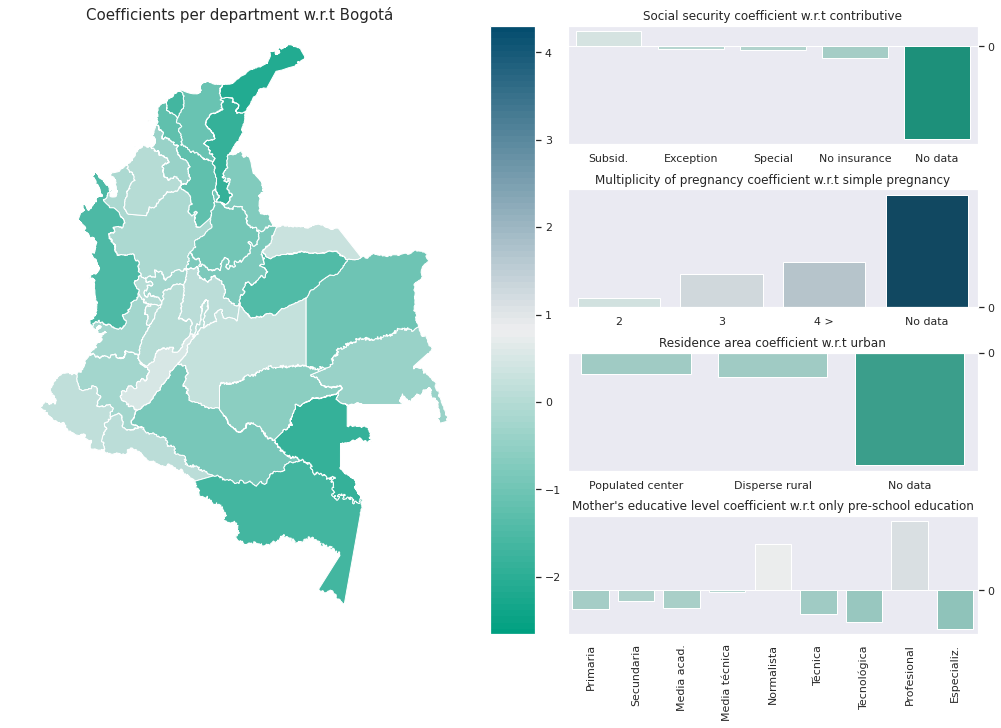

In [33]:
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(15,10),constrained_layout=True)

gs = GridSpec(4, 40, figure=fig)
len_side = 17  #Relative size of the plots on the right

ax1 = fig.add_subplot(gs[:, :-len_side])
ax2 = fig.add_subplot(gs[0, -len_side:])
ax3 = fig.add_subplot(gs[1, -len_side:])
ax4 = fig.add_subplot(gs[2, -len_side:])
ax5 = fig.add_subplot(gs[3, -len_side:])

from matplotlib.cm import ScalarMappable
my_cmap = cm 

vmin,vmax = coeffs.min(),coeffs.max()
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin,vmax))
sm.set_array([])

#Map
geo_df.plot('LogitCoeff',ax=ax1,legend=True,cmap=my_cmap,vmin=vmin,vmax=vmax)
ax1.set_xlim(left=-80)
ax1.set_ylim(top=13)
ax1.axis('off')
ax1.set_title('Coefficients per department w.r.t Bogotá',fontsize=15)

#Seguridad social
clrs = sm.to_rgba(seg_soc['0'])
sns.barplot(data=seg_soc.reset_index(),x='index',y='0',
            ax=ax2,palette=clrs)
ax2.set_title('Social security coefficient w.r.t contributive')
ax2.set_xticklabels(['Subsid.','Exception','Special','No insurance','No data'])

#Tipo emb
clrs = sm.to_rgba(tipo_emb['0'])
sns.barplot(data=tipo_emb.reset_index(),x='index',y='0',
            ax=ax3,palette=clrs)
ax3.set_title('Multiplicity of pregnancy coefficient w.r.t simple pregnancy')
ax3.set_xticklabels(['2','3','4 >','No data'])


#Area residencia
clrs = sm.to_rgba(area_res['0'])
sns.barplot(data=area_res.reset_index(),x='index',y='0',
            ax=ax4,palette=clrs)
ax4.set_title('Residence area coefficient w.r.t urban')
ax4.set_xticklabels(['Populated center','Disperse rural','No data'])

#Nivel educ
clrs = sm.to_rgba(niv_edu['0'])
sns.barplot(data=niv_edu.reset_index(),x='index',y='0',
            ax=ax5,palette=clrs)    
ax5.set_title('Mother\'s educative level coefficient w.r.t only pre-school education')
ax5.set_xticklabels(['Primaria','Secundaria','Media acad.','Media técnica','Normalista',
                     'Técnica','Tecnológica','Profesional','Especializ.','Otros'],rotation=90)

for ax in [ax1,ax2,ax3,ax4,ax5]:
    #Set yticks on the right
    ax.set_yticks([0])
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_ylabel('')
    ax.set_xlabel('')

plt.savefig('../Plots/LogitCoeffs.png',dpi=300,bbox_inches='tight')
plt.show()